In [82]:
import sqlite3
import pandas as pd
import numpy as np
import sys

In [83]:
RT_LIMIT_LOWER = 3000
RT_LIMIT_UPPER = 3600

In [84]:
BASE_NAME = "/Users/darylwilding-mcbride/Downloads/HeLa_20KInt-rt-{}-{}".format(RT_LIMIT_LOWER,RT_LIMIT_UPPER)
CONVERTED_DATABASE_NAME = '{}/HeLa_20KInt.sqlite'.format(BASE_NAME)

In [117]:
DENOISED_BASE_NAME = "/Users/darylwilding-mcbride/Downloads/HeLa_20KInt-rt-{}-{}-denoised".format(RT_LIMIT_LOWER,RT_LIMIT_UPPER)
DENOISED_CONVERTED_DATABASE_NAME = '{}/HeLa_20KInt.sqlite'.format(DENOISED_BASE_NAME)

In [118]:
allpeptides_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/maxquant_results/txt/allPeptides.txt', sep='\t')

In [119]:
allpeptides_df.columns

Index(['Raw file', 'Charge', 'm/z', 'Mass', 'Resolution',
       'Number of data points', 'Number of frames', 'Number of isotopic peaks',
       'Isotope correlation', 'Mass fractional part', 'Mass deficit',
       'Retention time', 'Retention length', 'Retention length (FWHM)',
       'Min frame index', 'Max frame index', 'Ion mobility index',
       'Ion mobility index length', 'Ion mobility index length (FWHM)',
       'Intensity', 'Intensities', 'Number of pasef MS/MS', 'Pasef MS/MS IDs',
       'MS/MS scan number'],
      dtype='object')

In [120]:
allpeptides_df.rename(columns={'Number of isotopic peaks':'isotope_count', 'm/z':'mz', 'Number of data points':'number_data_points', 'Intensity':'intensity', 'Ion mobility index':'scan', 'Ion mobility index length':'scan_length', 'Ion mobility index length (FWHM)':'scan_length_fwhm', 'Retention time':'rt', 'Retention length':'rt_length', 'Retention length (FWHM)':'rt_length_fwhm', 'Charge':'charge_state', 'Number of pasef MS/MS':'number_pasef_ms2_ids', 'Isotope correlation':'isotope_correlation'}, inplace=True)

In [121]:
allpeptides_df.columns

Index(['Raw file', 'charge_state', 'mz', 'Mass', 'Resolution',
       'number_data_points', 'Number of frames', 'isotope_count',
       'isotope_correlation', 'Mass fractional part', 'Mass deficit', 'rt',
       'rt_length', 'rt_length_fwhm', 'Min frame index', 'Max frame index',
       'scan', 'scan_length', 'scan_length_fwhm', 'intensity', 'Intensities',
       'number_pasef_ms2_ids', 'Pasef MS/MS IDs', 'MS/MS scan number'],
      dtype='object')

In [122]:
# filter the features so it only has the RT range and the features were identified
allpeptides_subset_df = allpeptides_df[(allpeptides_df.intensity.notnull()) & (allpeptides_df.rt >= RT_LIMIT_LOWER) & (allpeptides_df.rt <= RT_LIMIT_UPPER) & (allpeptides_df.number_pasef_ms2_ids > 0)].copy()

In [123]:
# assign an ID to each MQ feature in the RT window
allpeptides_subset_df.sort_values(by=['intensity'], ascending=False, inplace=True)

In [124]:
allpeptides_subset_df["mq_feature_id"] = np.arange(start=1, stop=len(allpeptides_subset_df)+1)

In [125]:
allpeptides_subset_df.head()

,Raw file,charge_state,mz,Mass,Resolution,number_data_points,Number of frames,isotope_count,isotope_correlation,Mass fractional part,...,Max frame index,scan,scan_length,scan_length_fwhm,intensity,Intensities,number_pasef_ms2_ids,Pasef MS/MS IDs,MS/MS scan number,mq_feature_id
195754,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,714.35058,713.34330,25123.536245,230015,110,5,0.989167,0.343299,...,2826,183,306,78,25183000.0,NaN,4,215231;215241;215251;215260,2769.0,1
206499,HeLa_20KInt_2KIT_Slot1-46_01_1179,2,706.40506,1410.79560,25475.475995,195193,51,5,0.999257,0.795564,...,2849,540,321,57,21142000.0,NaN,4,222746;224128;224729;226009,45195.0,2
37567,HeLa_20KInt_2KIT_Slot1-46_01_1179,2,477.30736,952.60016,24713.404637,197487,63,5,0.993105,0.600162,...,3070,648,273,54,14855000.0,NaN,28,242384;242406;242416;242655;242664;242673;2426...,11855.0,3
48108,HeLa_20KInt_2KIT_Slot1-46_01_1179,2,492.78539,983.55623,25184.048249,86032,48,5,0.996168,0.556226,...,3017,702,255,57,12367000.0,NaN,19,238694;238705;238883;239098;239199;239211;2392...,13567.0,4
217234,HeLa_20KInt_2KIT_Slot1-46_01_1179,2,737.92866,1473.84280,24868.927671,111942,40,6,0.999151,0.842772,...,2963,537,369,66,10880000.0,NaN,19,234158;234167;234195;234372;234529;234539;2345...,50179.0,5


In [126]:
allpeptides_subset_df.mq_feature_id.max()

9376

In [161]:
allpeptides_subset_df.mq_feature_id.min()

1

### Set MQ feature to visualise

In [190]:
# MQ_FEATURE_ID = 487
MQ_FEATURE_ID = 5000

In [191]:
mq_feature_df = allpeptides_subset_df[allpeptides_subset_df.mq_feature_id==MQ_FEATURE_ID]
mq_feature_df

,Raw file,charge_state,mz,Mass,Resolution,number_data_points,Number of frames,isotope_count,isotope_correlation,Mass fractional part,...,Max frame index,scan,scan_length,scan_length_fwhm,intensity,Intensities,number_pasef_ms2_ids,Pasef MS/MS IDs,MS/MS scan number,mq_feature_id
72598,HeLa_20KInt_2KIT_Slot1-46_01_1179,2,538.30779,1074.601,23359.542507,2742,17,3,0.993978,0.601031,...,2847,612,36,18,39992.0,NaN,2,225793;225802,19302.0,5000


In [192]:
DELTA_MZ = 1.003355     # Mass difference between Carbon-12 and Carbon-13 isotopes, in Da. For calculating the spacing between isotopic peaks.
PROTON_MASS = 1.007276  # Mass of a proton in unified atomic mass units, or Da. For calculating the monoisotopic mass.

In [193]:
MZ_TOLERANCE_PPM = 5
MZ_TOLERANCE_PERCENT = MZ_TOLERANCE_PPM * 10**-4

In [194]:
mz = mq_feature_df.mz.values[0]
mz_delta = mz * MZ_TOLERANCE_PERCENT / 100
mz_lower = mz - mz_delta
mz_upper = mz + mz_delta

scan = mq_feature_df.scan.values[0]
scan_delta = int(mq_feature_df.scan_length.values[0] / 2)
scan_lower = scan - scan_delta
scan_upper = scan + scan_delta

rt = mq_feature_df.rt.values[0]
rt_delta = mq_feature_df.rt_length.values[0] / 2
rt_lower = rt - rt_delta
rt_upper = rt + rt_delta

charge_state = mq_feature_df.charge_state.values[0]
isotope_count = mq_feature_df.isotope_count.values[0]
isotope_correlation = mq_feature_df.isotope_correlation.values[0]

In [195]:
expected_isotope_spacing_mz = DELTA_MZ / charge_state
expected_isotope_spacing_mz

0.5016775

In [196]:
# load the raw frame points in the feature's region
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
raw_frames_df = pd.read_sql_query("select * from frames where retention_time_secs >= {} and retention_time_secs <= {} and scan >= {} and scan <= {} and mz >= {} and mz <= {}".format(rt_lower,rt_upper,scan_lower-10,scan_upper+10,mz_lower-(2*expected_isotope_spacing_mz),mz_lower+(isotope_count*expected_isotope_spacing_mz)), db_conn)
db_conn.close()

In [197]:
# load the raw frame points in the feature's region
db_conn = sqlite3.connect(DENOISED_CONVERTED_DATABASE_NAME)
denoised_raw_frames_df = pd.read_sql_query("select * from frames where retention_time_secs >= {} and retention_time_secs <= {} and scan >= {} and scan <= {} and mz >= {} and mz <= {}".format(rt_lower,rt_upper,scan_lower-10,scan_upper+10,mz_lower-(2*expected_isotope_spacing_mz),mz_lower+(isotope_count*expected_isotope_spacing_mz)), db_conn)
db_conn.close()

In [198]:
len(raw_frames_df), len(denoised_raw_frames_df)

(3182, 2343)

In [199]:
raw_frames_df["hover"] = raw_frames_df["mz"].map('{:,.4f} m/z'.format) + ', ' + raw_frames_df["scan"].map('{} scan'.format) + ', ' + raw_frames_df["retention_time_secs"].map('RT {:.1f} secs'.format)
raw_frames_df['frame_point'] = raw_frames_df['frame_id'].map(str) + '|' + raw_frames_df['point_id'].map(str)

In [200]:
denoised_raw_frames_df["hover"] = denoised_raw_frames_df["mz"].map('{:,.4f} m/z'.format) + ', ' + denoised_raw_frames_df["scan"].map('{} scan'.format) + ', ' + denoised_raw_frames_df["retention_time_secs"].map('RT {:.1f} secs'.format)
denoised_raw_frames_df['frame_point'] = denoised_raw_frames_df['frame_id'].map(str) + '|' + denoised_raw_frames_df['point_id'].map(str)

In [201]:
isotope_point_df_list = []
for isotope_idx in range(0,isotope_count):
    isotope_mz_lower = mz_lower + (isotope_idx * expected_isotope_spacing_mz)
    isotope_mz_upper = mz_upper + (isotope_idx * expected_isotope_spacing_mz)
    matches_df = raw_frames_df[
        (raw_frames_df.mz >= isotope_mz_lower) &
        (raw_frames_df.mz <= isotope_mz_upper) &
        (raw_frames_df.retention_time_secs >= rt_lower) &
        (raw_frames_df.retention_time_secs <= rt_upper) &
        (raw_frames_df.scan >= scan_lower) &
        (raw_frames_df.scan <= scan_upper)
    ]
    isotope_point_df_list.append((matches_df))

In [202]:
denoised_isotope_point_df_list = []
for isotope_idx in range(0,isotope_count):
    isotope_mz_lower = mz_lower + (isotope_idx * expected_isotope_spacing_mz)
    isotope_mz_upper = mz_upper + (isotope_idx * expected_isotope_spacing_mz)
    matches_df = denoised_raw_frames_df[
        (denoised_raw_frames_df.mz >= isotope_mz_lower) &
        (denoised_raw_frames_df.mz <= isotope_mz_upper) &
        (denoised_raw_frames_df.retention_time_secs >= rt_lower) &
        (denoised_raw_frames_df.retention_time_secs <= rt_upper) &
        (denoised_raw_frames_df.scan >= scan_lower) &
        (denoised_raw_frames_df.scan <= scan_upper)
    ]
    denoised_isotope_point_df_list.append((matches_df))

In [203]:
isotope_points_df = pd.concat(isotope_point_df_list)
isotope_points_df["part_of_feature"] = True

In [204]:
denoised_isotope_points_df = pd.concat(denoised_isotope_point_df_list)
denoised_isotope_points_df["part_of_feature"] = True

In [205]:
# separate the points assigned to isotopes from the unallocated points
unallocated_df = raw_frames_df[~raw_frames_df.frame_point.isin(isotope_points_df.frame_point)].copy()
unallocated_df["part_of_feature"] = False

In [206]:
# separate the points assigned to isotopes from the unallocated points
denoised_unallocated_df = denoised_raw_frames_df[~denoised_raw_frames_df.frame_point.isin(denoised_isotope_points_df.frame_point)].copy()
denoised_unallocated_df["part_of_feature"] = False

In [207]:
feature_segmentation_df = pd.concat([isotope_points_df,unallocated_df])

In [208]:
denoised_feature_segmentation_df = pd.concat([denoised_isotope_points_df,denoised_unallocated_df])

In [209]:
print("{} feature points, {} unallocated points".format(len(isotope_points_df),len(unallocated_df)))

404 feature points, 2778 unallocated points


In [210]:
# which points are in the standard but not the denoised?
extra_unallocated_df = unallocated_df[~unallocated_df.frame_point.isin(denoised_unallocated_df.frame_point)].copy()

In [211]:
len(unallocated_df), len(denoised_unallocated_df), len(extra_unallocated_df)

(2778, 1945, 2778)

In [212]:
import pickle
pkl_file_name = "{}/mq-feature-{}-raw-frames-df.pkl".format(BASE_NAME,MQ_FEATURE_ID)
feature_segmentation_df.to_pickle(pkl_file_name)
print("saved {} points to {}".format(len(feature_segmentation_df),pkl_file_name))

pkl_file_name = "{}/mq-feature-{}-raw-frames-denoised-df.pkl".format(BASE_NAME,MQ_FEATURE_ID)
denoised_feature_segmentation_df.to_pickle(pkl_file_name)
print("saved {} points to {}".format(len(denoised_feature_segmentation_df),pkl_file_name))

saved 3182 points to /Users/darylwilding-mcbride/Downloads/HeLa_20KInt-rt-3000-3600/mq-feature-5000-raw-frames-df.pkl
saved 2343 points to /Users/darylwilding-mcbride/Downloads/HeLa_20KInt-rt-3000-3600/mq-feature-5000-raw-frames-denoised-df.pkl


In [213]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

3.5.0


In [214]:
init_notebook_mode(connected=True)

In [215]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

In [216]:
tableau20_py = tableau20.copy()

In [217]:
import plotly.plotly as py
import plotly.graph_objs as go

traces = []

# plot all the unallocated points in the region
trace = go.Scatter3d(
    x = unallocated_df.mz,
    y = unallocated_df.scan,
    z = unallocated_df.intensity,
    mode = 'markers',
    marker = dict(
        size = 5,
        color = "rgb(128,128,128)",
        opacity = 0.5
    ),
    text = unallocated_df.hover,
    hoverinfo = 'text',
    name = "unallocated - standard"
)
traces.append((trace))

# plot all the unallocated points in the region
trace = go.Scatter3d(
    x = denoised_unallocated_df.mz,
    y = denoised_unallocated_df.scan,
    z = denoised_unallocated_df.intensity,
    mode = 'markers',
    marker = dict(
        size = 5,
        color = "rgb(255,128,128)",
        opacity = 0.5
    ),
    text = denoised_unallocated_df.hover,
    hoverinfo = 'text',
    name = "unallocated - denoised"
)
traces.append((trace))

# plot the isotopes
trace = go.Scatter3d(
    x = isotope_points_df.mz,
    y = isotope_points_df.scan,
    z = isotope_points_df.intensity,
    mode = 'markers',
    marker = dict(
        size = 5,
        color = "rgb{}".format(tableau20_py[5]),
        opacity = 0.8
    ),
    text = isotope_points_df.hover,
    hoverinfo = 'text',
    name = "allocated - standard"
)
traces.append((trace))

# plot the isotopes
trace = go.Scatter3d(
    x = denoised_isotope_points_df.mz,
    y = denoised_isotope_points_df.scan,
    z = denoised_isotope_points_df.intensity,
    mode = 'markers',
    marker = dict(
        size = 5,
        color = "rgb{}".format(tableau20_py[3]),
        opacity = 0.8
    ),
    text = denoised_isotope_points_df.hover,
    hoverinfo = 'text',
    name = "allocated - denoised"
)
traces.append((trace))


data = traces
layout = go.Layout(
    autosize=False,
    width=900,
    height=600,
    title='Raw points (across the feature\'s RT extent) comprising the isotopic peaks for MQ feature {}<br>Isotope correlation {:,.2f}'.format(MQ_FEATURE_ID,isotope_correlation),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=40
    ),
    scene = dict(
        xaxis = dict(
            title='m/z', autorange='reversed'),
        yaxis = dict(
            title='scan'),
        zaxis = dict(
            title='intensity')
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Histogram of frame intensity

In [219]:
MS1_CE = 10

In [220]:
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
ms1_frame_properties_df = pd.read_sql_query("select frame_id,retention_time_secs from frame_properties where collision_energy == {}".format(MS1_CE), db_conn)
db_conn.close()

In [223]:
FRAME_ID = ms1_frame_properties_df.frame_id.min()

In [224]:
FRAME_ID

27937

In [225]:
# load the raw points for this frame
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
raw_frames_df = pd.read_sql_query("select * from frames where frame_id == {}".format(FRAME_ID), db_conn)
db_conn.close()


In [226]:
# load the raw points for this frame
db_conn = sqlite3.connect(DENOISED_CONVERTED_DATABASE_NAME)
denoised_raw_frames_df = pd.read_sql_query("select * from frames where frame_id == {}".format(FRAME_ID), db_conn)
db_conn.close()


In [227]:
len(raw_frames_df), len(denoised_raw_frames_df)

(170952, 90803)

In [229]:
import matplotlib.pyplot as plt

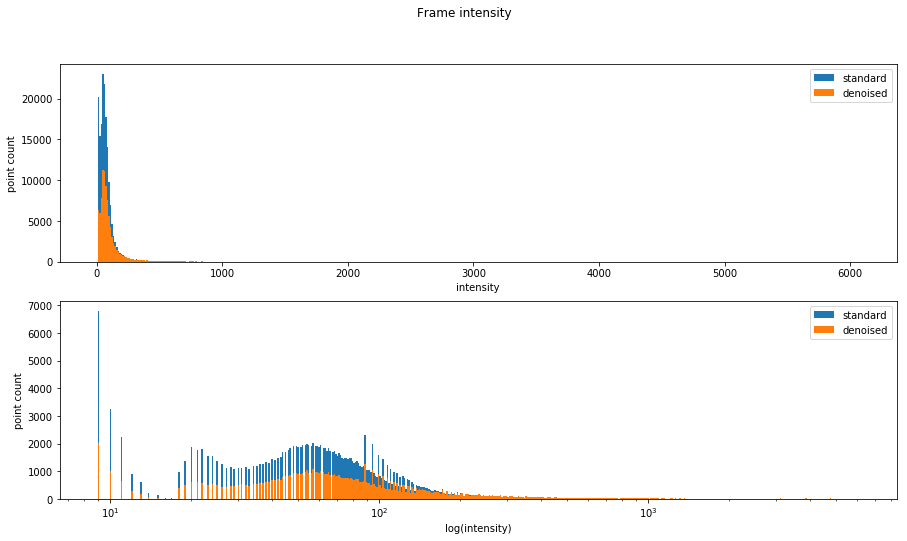

In [255]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Frame intensity')
plt.title('frame_id {}'.format(FRAME_ID))

plt.subplot(211)
bins = 500
hist, bins, _ = plt.hist(raw_frames_df.intensity, bins=bins, label='standard')
hist, bins, _ = plt.hist(denoised_raw_frames_df.intensity, bins=bins, label='denoised')
plt.legend(loc='best')
plt.xlabel('intensity')
plt.ylabel('point count')

logbins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))
plt.subplot(212)
plt.hist(raw_frames_df.intensity, bins=logbins, label='standard')
plt.hist(denoised_raw_frames_df.intensity, bins=logbins, label='denoised')
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel('log(intensity)')
plt.ylabel('point count')

plt.show()